In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
E_commerce_data = pd.read_csv("F:\\@BDA\\PDS\\PROJECT\\SURVEY_DATA_ON_ECOMMERCE_SITES.csv")

In [6]:
E_commerce_data

,Timestamp,Age,Gender,Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,Preference,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10/4/2021 16:24:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10/5/2021 10:27:02,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10/5/2021 11:15:06,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10/5/2021 11:26:37,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10/5/2021 16:43:34,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11/29/2021 18:48:15,20,Male,Graduate,Yes,"Electronics, Garments, Educational Materials, ...",4,No,4,Some times,Online Price is greater,5,7,14,Flipkart,Myntra,Grofers,NaN,NaN
122,11/29/2021 18:50:33,21,Female,Graduate,Yes,"Electronics, Educational Materials",3,No,4,Some times,Almost same,5,9,15,Others,Meesho,Big Basket,NaN,NaN
123,11/29/2021 18:53:39,27,Female,Post Graduate and above,Yes,"Electronics, Garments",5,No,5,Never,Almost same,4,12,24,Flipkart,Myntra,Grofers,NaN,NaN
124,11/29/2021 20:31:25,34,Female,Post Graduate and above,Yes,Electronics,4,Yes,4,Never,Online Price is greater,4,8,16,Amazon,Meesho,Amazon,NaN,NaN


In [5]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you prefer others for online shopping?":"Preference"}, axis = 1)

In [7]:
data = pd.DataFrame(columns=["Gender", "Preference", "Count"])

In [8]:
data.Gender = E_commerce_data.Gender
data.Preference = E_commerce_data.Preference
data.Count = 1

In [9]:
data

,Gender,Preference,Count
0,Male,5,1
1,Male,4,1
2,Male,4,1
3,Male,5,1
4,Male,4,1
...,...,...,...
121,Male,5,1
122,Female,5,1
123,Female,4,1
124,Female,4,1


In [10]:
grouped_data = data.groupby(["Gender", "Preference"]).sum(); grouped_data

Count
Gender Preference       
Female 2               1
       3              11
       4              19
       5               9
Male   0               1
       1               1
       2               2
       3              22
       4              41
       5              19

In [11]:
data2 = pd.DataFrame(columns=["Gender", "Preference"])
row_list = []
for i,j in grouped_data.index:
    dict1 = {}
    dict1.update({"Gender": i, "Preference":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1
df1["count"]  = list(grouped_data.Count); df1

,Gender,Preference,count
0,Female,2,1
1,Female,3,11
2,Female,4,19
3,Female,5,9
4,Male,0,1
5,Male,1,1
6,Male,2,2
7,Male,3,22
8,Male,4,41
9,Male,5,19


In [12]:
df2 = pd.DataFrame(0,columns=[0,1,2,3,4,5], index = ["Female", "Male"])

In [13]:
k = 0
for i,j in zip(list(df1.Gender), list(df1.Preference)):
    df2.at[str(i),j] = df1["count"][k]
    k = k+1

In [14]:
df2 = df2.div(df2.sum(axis=1), axis = 0)

In [15]:
df2 = df2*100

In [16]:
df2

,0,1,2,3,4,5
Female,0.000000,0.000000,2.500000,27.500000,47.500000,22.500000
Male,1.162791,1.162791,2.325581,25.581395,47.674419,22.093023


In [17]:
 df2['Gender'] = list(df2.index); df2

,0,1,2,3,4,5,Gender
Female,0.000000,0.000000,2.500000,27.500000,47.500000,22.500000,Female
Male,1.162791,1.162791,2.325581,25.581395,47.674419,22.093023,Male


In [18]:
for i,j in zip(list(df1.Gender), list(df1.Preference)):
    print("i = " ,i, "j = ",j)

i =  Female j =  2
i =  Female j =  3
i =  Female j =  4
i =  Female j =  5
i =  Male j =  0
i =  Male j =  1
i =  Male j =  2
i =  Male j =  3
i =  Male j =  4
i =  Male j =  5


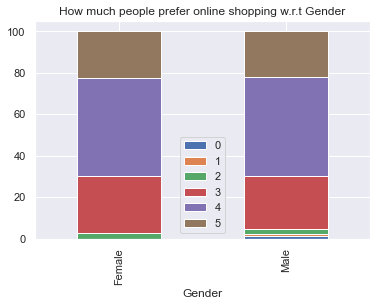

In [22]:
df2.plot(x="Gender", kind='bar', stacked=True,
        title='How much people prefer online shopping w.r.t Gender')
plt.savefig("9(a).png")